<a href="https://colab.research.google.com/github/Deepti-1027/Neuural_Cognitive_Modeling/blob/master/Plot_f_I_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip3 install brian2
!pip3 install --upgrade neurodynex3

Requirement already up-to-date: neurodynex3 in /usr/local/lib/python3.6/dist-packages (1.0.1)
Requirement already up-to-date: neurodynex in /usr/local/lib/python3.6/dist-packages (0.3.4)


In [2]:

%%capture
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools
import random


## What is f-I Curve ??

For a constant input current I, a LIF neuron fires regularly with firing frequency f. If the current is to small (I < I_min) f is 0Hz; for larger I the rate increases. A neuron's firing-rate versus input-amplitude relationship is visualized in an "f-I curve".


## Draw the F-I curve for the Given Parameter :


**Resting potential = -70 mV,**     ## Urest

**Firing threshold = -45 mV,**      ## this is Theta

**Membrane time constant = 15 ms,**   ##this is tau

**Membrane resistance = 40 * 10^6Ω.**    ## this is R

In [3]:
V_REST = -70 * b2.mV                 # Resting potential
V_RESET = -65 * b2.mV
FIRING_THRESHOLD = -45 * b2.mV        #firing threshold
MEMBRANE_RESISTANCE = 40. * b2.Mohm   #Membrane resistace
MEMBRANE_TIME_SCALE = 15. * b2.ms   #Membrane time constant
ABSOLUTE_REFRACTORY_PERIOD = 3 * b2.ms

## Relationship between F and I:

\begin{equation} 
F = {(1/\tau)}*{1/ln[RI/(RI-\theta+urest)]} 
\end{equation} 

In [4]:
def simulate_LIF_neuron(input_current,simulation_time=5 * b2.ms,v_rest=V_REST,v_reset=V_RESET,firing_threshold=FIRING_THRESHOLD,membrane_resistance=MEMBRANE_RESISTANCE,membrane_time_scale=MEMBRANE_TIME_SCALE,
                        abs_refractory_period=ABSOLUTE_REFRACTORY_PERIOD):
                        
    eqs = """ dv/dt = ( -(v-v_rest) + membrane_resistance * input_current(t,i) ) / membrane_time_scale : volt (unless refractory)"""

    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",refractory=abs_refractory_period, method="linear")
    neuron.v = v_rest  # set initial value
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    # run the simulation
    b2.run(simulation_time)
    return state_monitor, spike_monitor



In [17]:
def getting_started():
    current_amp_list = np.arange(0, 5, 0.2)
    # store firing rates
    firing_rate_record = list()
    for current_amp in current_amp_list:
        # create step current
        step_current = input_factory.get_step_current(t_start=5, t_end=200, unit_time=b2.ms,amplitude = current_amp * b2.mA)
        # run simulation
        state_monitor, spike_monitor = simulate_LIF_neuron(input_current=step_current, simulation_time=125*b2.ms , abs_refractory_period = ABSOLUTE_REFRACTORY_PERIOD)
        # get the number of spikes
        spike_count = spike_monitor.count[0]
        # conver that to firing rate
        firing_rate = spike_count
        firing_rate_record.append(firing_rate)
    plt.figure()
    plt.plot(current_amp_list, firing_rate_record)
    plt.xlabel('Current (mA)')
    plt.ylabel('Firing rate (Hz)')
    plt.title('F-I Curve')
    plt.show()


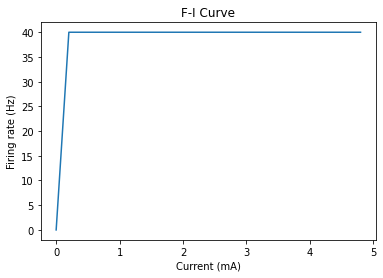

In [18]:
if __name__ == "__main__":
    getting_started()